In [1]:
%%bash
sudo pip uninstall --yes pychemkin
sudo pip install numpy scipy pandas --upgrade
cd /tmp/cs207-FinalProject/
sudo python setup.py install # please change the path

Uninstalling pychemkin-1.0.8:
  Successfully uninstalled pychemkin-1.0.8
Requirement already up-to-date: numpy in /usr/lib/python3.6/site-packages
Requirement already up-to-date: scipy in /usr/lib/python3.6/site-packages
Requirement already up-to-date: pandas in /usr/lib/python3.6/site-packages
Requirement already up-to-date: pytz>=2011k in /usr/lib/python3.6/site-packages (from pandas)
Requirement already up-to-date: python-dateutil>=2 in /usr/lib/python3.6/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /usr/lib/python3.6/site-packages (from python-dateutil>=2->pandas)
running install
running bdist_egg
running egg_info
writing pychemkin.egg-info/PKG-INFO
writing dependency_links to pychemkin.egg-info/dependency_links.txt
writing requirements to pychemkin.egg-info/requires.txt
writing top-level names to pychemkin.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'pychemkin.egg-info/SOURCES.txt'
installing library code to build

zip_safe flag not set; analyzing archive contents...
pychemkin.__pycache__.SQLParser.cpython-36: module references __file__


In [2]:
from pychemkin import ChemSolver, chemkin
import numpy as np

In [3]:
chem = chemkin("demo_xml/rxns.xml")
# initial concentration
x_init = [1]*6
T = 1000
# time series you want
ts = np.linspace(0,0.03,30)
# set to (min val in ts, max val in ts)
t_range = (0,0.03)
cs = ChemSolver(chem).solve(x_init, T, t_range, ts)
df = cs.to_df()
df.head()

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,T
0,0.000000,1.000000,1.000000,1.000000,1.000000e+00,1.00000,1.000000e+00,-6.288899e+06,6.289899e+06,6.827615e+06,-2.703580e+05,1.000000e+03,-6.559257e+06,1000.0
1,0.001034,1.000001,1.006530,2.986938,3.774152e-124,1.00653,7.543063e-07,-4.947693e+00,4.947693e+00,4.947693e+00,-1.034509e-118,1.127316e-120,-4.947693e+00,1000.0
2,0.002069,1.000001,1.006529,2.986938,2.692078e-247,1.00653,1.315340e-06,-8.627667e+00,8.627667e+00,8.627667e+00,-7.379083e-242,8.041069e-244,-8.627667e+00,1000.0
3,0.003103,1.000000,1.006531,2.986939,1.482197e-323,1.00653,-1.580176e-07,1.036478e+00,-1.036478e+00,-1.036478e+00,-4.036882e-318,4.446591e-320,1.036478e+00,1000.0
4,0.004138,0.999999,1.006532,2.986940,1.482197e-323,1.00653,-1.343200e-06,8.810384e+00,-8.810384e+00,-8.810384e+00,-4.036882e-318,4.446591e-320,8.810384e+00,1000.0


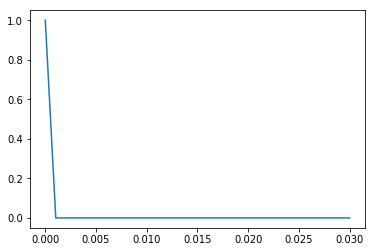

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['t'],df['H2-Concentration'])

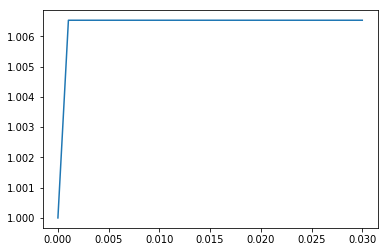

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['t'],df['H2O-Concentration'])